This notebook was used as a part of the DataEng project

Members = {Zeyad Omar, Youssef Ashraf, Fahd Al-Seba'ey}<br>
IDs = {46-17779, 46-16443, 46-1569}<br>
Majors = {Communications, Networks, Communications}


**--------------------------------------------------------------------------------------------------------** <br>
We used the same notebook for the preprocessing part of the project

Members = {Zeyad Omar, Omar Wasif}<br>
IDs = {46-17779, 46-10701}<br>
Majors = {Communications, Communications}


## Imports

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
#!pip install scikit-learn

In [2]:
# !pip install OSGridConverter
# from OSGridConverter import latlong2grid



Importing necessary packages is the first step in working with a python notebook document, as it allows the importing of all the necessary functions for them to be present and callable durnig execution.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy import stats
import seaborn as sns
import time
from datetime import datetime

<br>
<br>

***
***

<br>
<br>

## Helper Functions

In [4]:
def label_encode(column):
    """
    column : a pandas series object that 
             contains the categories to be encoded
             
    
    return a series with the corresponding encodings
    
    
    """
    
    
    label_encoder = preprocessing.LabelEncoder()
    
    result = column.copy() 
    if result.dtypes == object: 
        result = label_encoder.fit_transform(result)
    return result


def frequency_encode(df, col_name):
    """
    df : the dataframe object that contains the dataset
    col_name : the name of the column to be encoded
    
    
    return the encoded series and a lookup table for the encodings
    
    """
    
    
    enc = df[col_name].value_counts(normalize = True)
    
    result = df[col_name].apply(lambda x : enc[x])
    
    return result , enc


def plot_time_distribution(time_instances, label):
    """
    time instances : a list of timestamps for which 
                     the distribution is visualized
    
    label : a string that appears in the legend window
    
    returns None
    
    """
    
    
    bins = np.arange(0,25)
    hours = time_instances

    fig, ax = plt.subplots()

    labels = []
    for i in bins:
        if i<12:
            labels.append("{}:00AM".format(i))
        elif i == 12:
            labels.append("12:00PM")
        else:
            labels.append("{}:00PM".format(i-12))

    ax.hist(hours, bins, density = False, label = label)

    ax.set_xticks(bins + 0.5) # 0.5 is half of the "1" auto width
    ax.set_xticklabels(labels, rotation='vertical')
    fig.subplots_adjust(bottom = 0.2) # makes space for the vertical 
    
    plt.legend()
    plt.show()
    
    
    

def plot_dist(axis, road_type, var):
    """
        road_type : a variable in the UK_accidents dataset
                    that represents the road type
        
        var   :     the variable in the dataset for which 
                    you need to plot the distribution
    
    
        label : the label you want to put on the legend
        
    """
    axis.hist(df[df['road_type'] == road_type][var],
              density = True,
              label = str(road_type) +'_vs_'+ str(var));
    axis.legend()
    #axis.show()


def plot_distribution(col, df):
    counts = df[col].value_counts()
    plt.bar(counts.index, counts)
    plt.xticks(rotation=70)
    

    
    
    
# define a function that turns the hours into daytime groups
def categorize_hour(hour, bins = None, labels = None):
    """
    a function that return the category to which the given hour belongs
    
    hour : a time object representing the hour
    
    bins : a list of integers representing 
           the sections that will divide the day hours
           default => [5, 10, 15, 19, 23]
           so between 5 and 10 the first label is given to "hour"
    
    labels : a list of strings that will represent 
             the category of the sections provided by bins
             
    return a certain label as a string
    
    
    """
    if bins == None:
        bins = [0, 5, 10, 15, 19, 23]
    
    if labels == None:
        labels = ['night (0 - 5)',
                'morning rush (5 - 10)',
                'office hours (10 - 15)',
                'afternoon rush (15 - 19)',
                 'evening (19 - 23)']

    for i in range(len(bins)-1):
        if 23 <= hour <24.1:
            hour = 0
            
        if bins[i] <= hour < bins[i+1]:
            return labels[i]
    

def binary_encode(df, col_name, category):
    """
    df : the dataframe that contains the column to be encoded
    
    col_name : the name of the column to be encoded
    
    category : the specific class that will take the value 0 
               and the rest will take 1
    
    returns a lookup table for the encodings
    
    """
    mapping = {category : 0,
               'other': 1}
    
    df[col_name] = df[col_name].apply(lambda x: 0 if x==category else 1)
    return mapping
    
    
    
def disceretize_date(df, col_name, out_col_name):
    """
    df : the dataframe that contains the column to be disceretized
    
    col_name : the name of the column to be disceretized
    
    out_col_name : the new name of the disceretized column
    
    returns None
    
    """
    
    
    bins = [datetime(2010, 12, 30),
            datetime(2011, 3, 20),
            datetime(2011, 6, 21),
            datetime(2011, 9, 22),
            datetime(2011, 12, 31)]
    
    labels = ['Winter', 'Spring','Summer', 'Autumn']
    
    df[out_col_name] = pd.cut(df[col_name],
                              bins = bins,
                              labels = labels,
                              right = True)
    
    
def normalise_std(df, col_name):
    """
    df : the dataframe that contains the column to be normalized
    
    col_name : the name of the column to be normalized
    
    """
    
    
    nomerator = (df[col_name]-df[col_name].mean())
    denominator = df[col_name].std()
    
    df[col_name] = nomerator / denominator

def normalise_minmax(df, col_name):
    """
    df : the dataframe that contains the column to be normalized

    col_name : the name of the column to be normalized
    
    """
    
    nomerator = (df[col_name] - df[col_name].min())
    
    denominator = (df[col_name].max() - df[col_name].min())
    
    
    df[col_name] = nomerator / denominator

    
    


<br>
<br>

***
***

<br>
<br>

## Loading the Dataset

In [15]:
df = pd.read_csv("2011_Accidents_UK.csv")
df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_9024\1042810543.py:1: DtypeWarning:

Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.



,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201101BS70001,2011,01BS70001,525590.0,178980.0,-0.192203,51.495766,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
1,201101BS70002,2011,01BS70002,527450.0,179020.0,-0.165408,51.495710,Metropolitan Police,Serious,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
2,201101BS70003,2011,01BS70003,527120.0,178350.0,-0.170401,51.489763,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
3,201101BS70005,2011,01BS70005,525400.0,179210.0,-0.194856,51.497875,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
4,201101BS70007,2011,01BS70007,526280.0,177540.0,-0.182783,51.482671,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


In [16]:
df_copy = df.copy()

Creating a copy of the dataframe as backup 

<br>
<br>

***
***

<br>
<br>

## Expolratory Data Analysis (EDA)

In [7]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [8]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,151474.0,151474.000000,1.514740e+05,151474.000000,151474.000000,151474.000000,151474.000000,151474.000000
mean,2011.0,442455.016775,2.964183e+05,-1.395452,52.555538,1.823118,1.346436,38.536118
std,0.0,95286.973106,1.611204e+05,1.400812,1.450786,0.710169,0.856727,13.865595
min,2011.0,65670.000000,1.110000e+04,-7.507468,49.920895,1.000000,1.000000,20.000000
25%,2011.0,379763.000000,1.774400e+05,-2.303150,51.482891,1.000000,1.000000,30.000000
50%,2011.0,445150.000000,2.579950e+05,-1.330088,52.205278,2.000000,1.000000,30.000000
75%,2011.0,524790.000000,3.949840e+05,-0.199122,53.450321,2.000000,1.000000,50.000000
max,2011.0,655370.000000,1.198000e+06,1.759382,60.662043,34.000000,87.000000,70.000000


Lets see what columns we have

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151474 entries, 0 to 151473
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               151474 non-null  object 
 1   accident_year                                151474 non-null  int64  
 2   accident_reference                           151474 non-null  object 
 3   location_easting_osgr                        151474 non-null  float64
 4   location_northing_osgr                       151474 non-null  float64
 5   longitude                                    151474 non-null  float64
 6   latitude                                     151474 non-null  float64
 7   police_force                                 151474 non-null  object 
 8   accident_severity                            151474 non-null  object 
 9   number_of_vehicles                           151474 non-nul

It seems we have 151474 total entries and some of them are missing

It looks like the date variable (column number 11) is seen as a string <br>
so we need to convert it to datetime object to ease its processing

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151474 entries, 0 to 151473
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               151474 non-null  object        
 1   accident_year                                151474 non-null  int64         
 2   accident_reference                           151474 non-null  object        
 3   location_easting_osgr                        151474 non-null  float64       
 4   location_northing_osgr                       151474 non-null  float64       
 5   longitude                                    151474 non-null  float64       
 6   latitude                                     151474 non-null  float64       
 7   police_force                                 151474 non-null  object        
 8   accident_severity                            151474 non-null  ob

Now we can see that the date variable is stored as datetime object

<br>
<br>

***
***
***

<br>
<br>

# Section II: Data Cleaning

Before doing any processing on the data, we must ensure that the data is clean. In this section, multiple different "unclean" aspects of the data will be studied and handled accordingly. The process of cleaning the data will be divided into 6 main stages:

1. Checking for Duplicates
2. Detecting Outliers
3. Cross-Checking and Validating the Data
4. Removing Redundant Data
5. Finding and Handling Missing Values
6. Checking Data is completely clean

<br>

***
***
<br>

## Cleaning 1: Checking for Duplicates

In [12]:
df_slice = df.iloc[:,3:]

dups = df_slice.duplicated(keep = False)

sum(dups)

10

5 rows were found to have duplicates after excluding the index, year, and the reference

Since the accident reference is almost the same or was due to data entry error <br>
we will keep only the first instance

In [13]:
print(len(df))

df.drop_duplicates(subset=df.columns[3:], inplace = True)

print(len(df))

df.head()

151474
151469


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,201101BS70001,2011,01BS70001,525590.0,178980.0,-0.192203,51.495766,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812
1,201101BS70002,2011,01BS70002,527450.0,179020.0,-0.165408,51.495710,Metropolitan Police,Serious,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819
2,201101BS70003,2011,01BS70003,527120.0,178350.0,-0.170401,51.489763,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914
3,201101BS70005,2011,01BS70005,525400.0,179210.0,-0.194856,51.497875,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813
4,201101BS70007,2011,01BS70007,526280.0,177540.0,-0.182783,51.482671,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913


In [14]:
df_slice = df.iloc[:,3:]

dups = df_slice.duplicated(keep = False)

sum(dups)

0

#### Duplicates were dropped and only the 1st instances were kept..

<br>

***
***
<br>

## Cleaning 2: Outliers Detection

It is especially important to check for outliers in variables that are numerical in nature.

It is also important to ask oneself whether an outlier of a certain field makes sense, and is okay to keep, or it has to be handled, as they don't reflect the true nature of the data, and may harm the model in the future when attempting to make predictions.

For example, in location fields: it is sensible that there exists an outlier: because not all accidents happen in crowded or common areas, accidents also happen remote areas that are barely visited.

However, in number of casualties: accidents with an excessive number of casualties are suspicious.. either these accidents were catastrophic in an excessive manner or the data is erroneous. Either way, these entries with more than 10 casualties do not reflect the true nature of the data and are rare enough for them to be safely ignored in preparing data for the model.

In this subsection, we shall investigate outliers in 3 numerical fields. For each of these fields we will study the distribution of the outliers and we will decide whether the outliers make sense to remove/keep.

1. Number of Casualties
2. Number of Vehicles
3. Speed Limit

Let's begin..!

<br>

-------------------------------------

<br>

### Outliers 1: Number of Casualties

The number of casualties per accident is an important field in our data set around which revolves a lot of the questions and analysis to be performed later. It is thus important to handle the outliers properly. Since this is a simple numerical integer field, we will use the z-value method to identify and eliminate any outliers.

In [15]:
df['number_of_casualties'].value_counts()

1     116872
2      23671
3       6904
4       2528
5        900
6        350
7        123
8         49
9         23
11        14
10        11
12         5
13         4
14         2
22         2
26         2
51         2
63         1
15         1
16         1
18         1
21         1
25         1
87         1
Name: number_of_casualties, dtype: int64

As we can see, the crushing majority of accidents involved less than 4 outliers. Thus, accidents with an excessive number of casualties (eg. 10+) are nothing but an anomaly, either a really catastrophic event that doesn't happen a lot and therefore impossible to predict, or an error during data entry.

Either way, we shall handle these outliers.

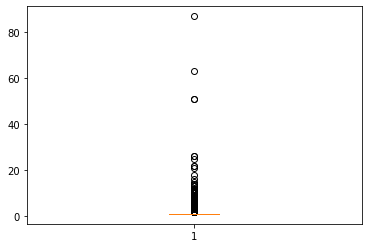

In [16]:
plt.boxplot(df.number_of_casualties)
plt.show()

There are multiple values that appear to be outliers

In [17]:
z = np.abs(stats.zscore(df['number_of_casualties']))
z

array([0.40438006, 0.40438006, 0.40438006, ..., 0.40438006, 0.40438006,
       1.93006017])

Lets create a mask to filter the non-outliers

In [18]:
filtered_entries = z < 3
filtered_entries

array([ True,  True,  True, ...,  True,  True,  True])

the 3 in the above cell represents 3 x (std)  

In [19]:
df = df[filtered_entries]

len(df)

147447

In [20]:
df.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,147447.0,147447.000000,1.474470e+05,147447.000000,147447.000000,147447.000000,147447.000000,147447.000000
mean,2011.0,442841.638175,2.959926e+05,-1.389962,52.551677,1.805456,1.254186,38.354460
std,0.0,95317.882781,1.613605e+05,1.401337,1.452933,0.677399,0.532189,13.759549
min,2011.0,65670.000000,1.110000e+04,-7.507468,49.920895,1.000000,1.000000,20.000000
25%,2011.0,380442.500000,1.773100e+05,-2.294272,51.481825,1.000000,1.000000,30.000000
50%,2011.0,445660.000000,2.561600e+05,-1.321606,52.192362,2.000000,1.000000,30.000000
75%,2011.0,525010.000000,3.946000e+05,-0.196431,53.445891,2.000000,1.000000,40.000000
max,2011.0,655370.000000,1.198000e+06,1.759382,60.662043,11.000000,3.000000,70.000000


Now let's check the boxplot distribution again..

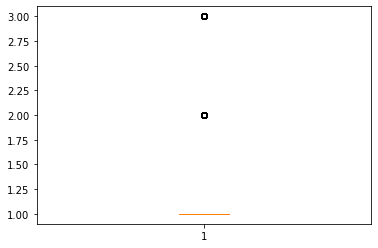

In [21]:
plt.boxplot(df.number_of_casualties)
plt.show()

#### The number of outliers have been very significantly reduced! Meanwhile, the minimum, maximum and median remained the same.

#### Thus, we can feel good about getting rid of the outliers in the number of casualties!

<br>

-------------------------------------

<br>

### Outliers 2: Number of Vehicles

The case for the number of vehicles involved in the accident is pretty much similar for that of the number of casualties.

This time, we shall identify outliers by defining the interquartile range and setting a certain maximum and minimum based on that range.

In [22]:
df['number_of_vehicles'].value_counts()

2     88099
1     45858
3     10730
4      2144
5       422
6       130
7        36
8        14
9         8
10        5
11        1
Name: number_of_vehicles, dtype: int64

There aren't much excessive values. However, the extreme values (eg. 8+) are rare enough to be considered anomalous, without any potential predictive power and ineffective in the prediction model.

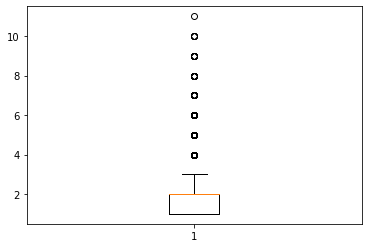

In [23]:
plt.boxplot(df.number_of_vehicles)
plt.show()

There are multiple values that appear to be outliers

lets use IQR method for detection and handling

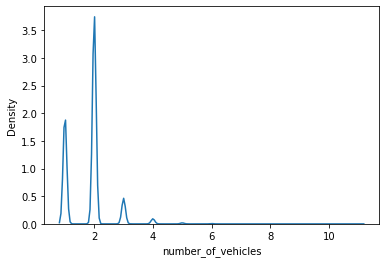

In [24]:
sns.kdeplot(df['number_of_vehicles'])

In [25]:
Q1 = df['number_of_vehicles'].quantile(0.25)
Q3 = df['number_of_vehicles'].quantile(0.75)

iqr = Q3 - Q1

whisk = 1.5

print(iqr)

1.0


In [26]:
cut_off = iqr * whisk

lower = Q1 - cut_off
upper = Q3 + cut_off

mask = (df['number_of_vehicles'] < upper) & \
        (df['number_of_vehicles'] > lower)

print(len(df))

df = df[mask]

len(df)

147447


144687

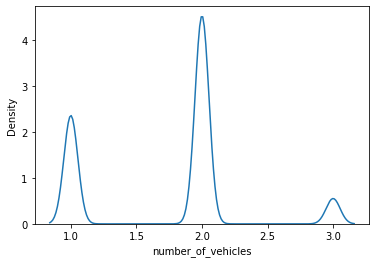

In [27]:
sns.kdeplot(df['number_of_vehicles'])

#### We have handled the oultiers in the "number_of_vehicles" field. Notice that the relative distribution between 1, 2 and 3 vehicles hasn't changed any visibly from before removing the outliers.

<br>

-------------------------------------

<br>

### Outliers 3: Speed Limit

This time, the case is different. As it makes sense that a road can have any speed limit, or no speed limit at all.

Moreover, data in the case of speed limits is harder to be erroenous. As speed limits are stored in government charts and databases, and can publicly obtained from services like google maps.

Thus, we should be careful about discarding the outliers as unimportant or excessive.

In [28]:
df['speed_limit'].value_counts()

30.0    96221
60.0    20933
40.0    11713
70.0     9075
50.0     4844
20.0     1901
Name: speed_limit, dtype: int64

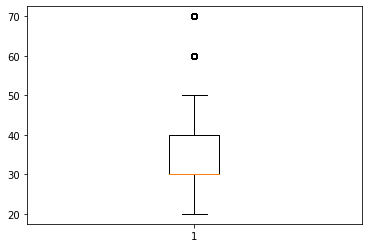

In [29]:
plt.boxplot(df.speed_limit)
plt.show()

The values 60 and 70 mphs appear to be outliers but we will leave them unchanged as they are reasonable. There are around 26000 accidents that were reported as happening in streets with 60 and/or 70 mph limits. This is a significant portion of all accidents, and cannot in any case be discarded as anomalous.

In [19]:
df['speed_limit']

0         30.0
1         30.0
2         30.0
3         30.0
4         30.0
          ... 
151469    70.0
151470    60.0
151471    70.0
151472    60.0
151473    60.0
Name: speed_limit, Length: 151474, dtype: float64

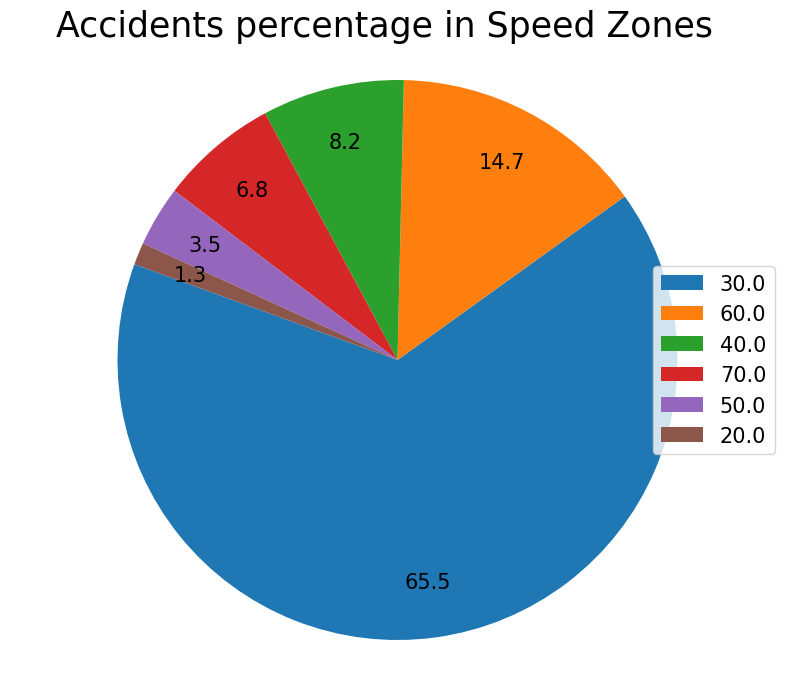

In [20]:
#speed_zone_accidents = df[df['speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]


speed  = df['speed_limit'].value_counts()

plt.figure(figsize=(10,8))


plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8,
        labeldistance=1.9 ,shadow=False, 
        startangle=160,
        textprops={'fontsize': 15})
 

plt.axis('equal')
plt.legend(speed.index, loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
plt.figtext(.5,.9,'Accidents percentage in Speed Zones', fontsize=25, ha='center')
plt.show()

<br>

***
***
<br>

## Cleaning 3: Cross-Checking and Validating the Data

In some cases, certain patterns and/or redundancies exist that allow the data to be cross-checked with itself.

### Validation 1: Map of UK

We have 4 location variables:

1. location_easting_osgr
2. location_northing_osgr
3. longitude
4. latitude

Those variables represent the location of the accident. <br>

In [31]:
df[['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude']].describe()

,location_easting_osgr,location_northing_osgr,longitude,latitude
count,144687.000000,1.446870e+05,144687.000000,144687.000000
mean,442841.044835,2.961252e+05,-1.389998,52.552862
std,95350.357061,1.615609e+05,1.401885,1.454729
min,65670.000000,1.110000e+04,-7.507468,49.920895
25%,380488.000000,1.773200e+05,-2.293607,51.481922
50%,445650.000000,2.562300e+05,-1.321651,52.192727
75%,525080.000000,3.947435e+05,-0.195715,53.447281
max,655370.000000,1.198000e+06,1.759382,60.662043


#### How can we verify that AT LEAST one of these coordinate systems is valid??

A fancy trick we can do is to plot one of the 2 coordinate systems (lat & long) or (north & east) in a scatter plot. The result is very satisfying!

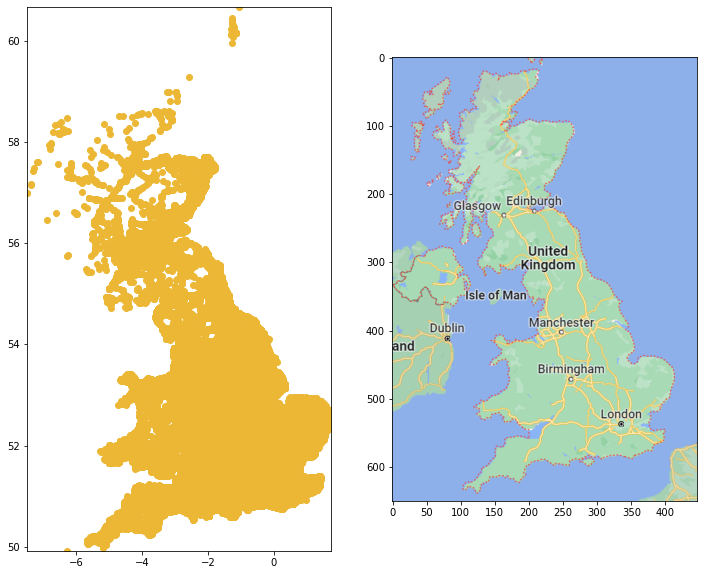

In [32]:
img = plt.imread("uk_map.png")

fig, ((ax1, ax2)) = plt.subplots(1, 2)

fig.set_figheight(10)
fig.set_figwidth(12)

ax1.scatter(x = df['longitude'],
           y = df['latitude'],
           color = "#ebb734")

ax2.imshow(img)

ax1.set_xbound(df['longitude'].min(),
               df['longitude'].max())


ax1.set_ybound(df['latitude'].min(),
               df['latitude'].max())

plt.show()

#### The scatter plot matched the map of UK..! so we can feel confident that the values for latitude and longitude are not randomly generated.

<br>

***

<br>

### Validation 2: Checking the accident index, accident year, and accident reference columns

Let's examine the first 3 columns in the dataframe:

In [33]:
df_slice = df.iloc[:,0:3]
df_slice.head()

,accident_index,accident_year,accident_reference
0,201101BS70001,2011,01BS70001
1,201101BS70002,2011,01BS70002
2,201101BS70003,2011,01BS70003
3,201101BS70005,2011,01BS70005
4,201101BS70007,2011,01BS70007


It's clear that the accident_index field is just a combination of the following 2 fields.

We can perform a quick analysis on the remaining entries to make sure that this observation is consistent, which vouches for the validity of the data.

In [34]:
df.count()[0]

144687

In [35]:
df['accident_index'].apply(lambda x: x[0:4]).unique()

array(['2011'], dtype=object)

In [36]:
df['accident_year'].unique()

array([2011], dtype=int64)

In [37]:
df['extracted_reference'] = df['accident_index'].apply(lambda x: x[4:])

In [38]:
sum(df['extracted_reference'] == df['accident_reference'])

144687

The count of entries = 147447
<br>
The count of entries that satisfy the relationship = 147447

Therefore: accident_index = concat( accident_year, accident_reference )

#### The first 3 columns seem to be self-consistent, which vouches for the validity of the data.

<br>

***
***
<br>

## Cleaning 4: Removing Redundant Data

The location of the accident has been recorded in 2 different global positioning coordinate systems: latitude and longitude.. as well as northings and eastings.

If both these fields encode the same information, we can confidently get rid of one of them, since we have no use for the redundant data.

Again, we can use the "map of UK" method to check that the northings and eastings are also representing valid coordinates.

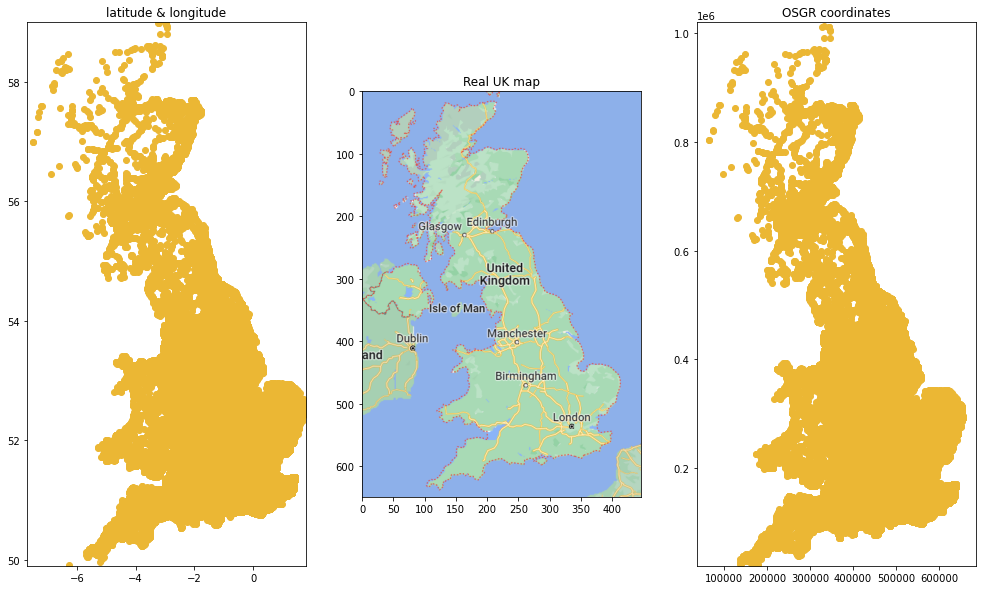

In [39]:
img = plt.imread("uk_map.png")

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3)
fig.set_figheight(10)
fig.set_figwidth(17)

ax1.scatter(x = df['longitude'],
           y = df['latitude'],
           color = "#ebb734")

ax2.imshow(img)

ax3.scatter(x = df['location_easting_osgr'],
           y = df['location_northing_osgr'],
           color = "#ebb734")

ax1.set_ybound(49.9, 59)
ax1.set_xbound(-7.7, 1.8)

ax3.set_ybound(0.02e6, 1.02e6)








ax1.set(title = 'latitude & longitude')
ax2.set(title = 'Real UK map')
ax3.set(title = 'OSGR coordinates')







plt.show()

#### The scatter-plot maps are IDENTICAL, even the outliers match. We can feel confident that the osgr locations are redundant.

To be more sure, lets see the correlation between the two coordinate systems (long, lat) and (osgr)

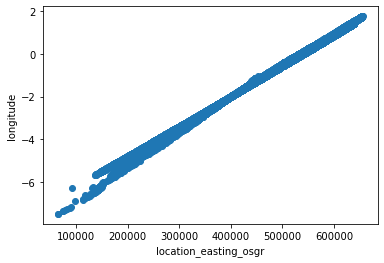

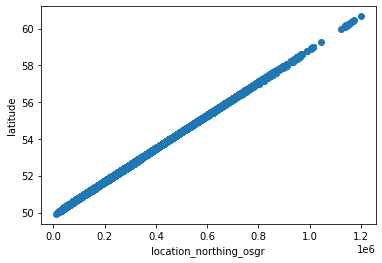

In [40]:

plt.scatter(df['location_easting_osgr'],
            df['longitude']);

plt.xlabel('location_easting_osgr');
plt.ylabel('longitude');

plt.show();

plt.scatter(df['location_northing_osgr'],
            df['latitude']);

plt.xlabel('location_northing_osgr');
plt.ylabel('latitude');


We can see that the correlation between the 2 systems is very high almost 1 <br>
so we can drop one of them as the correlation between variables might mislead us when making decisions

Since latitude and longitude coordinates are more commonly used and have more functions and packages that allow manipulating them, we will keep them.

We shall proceed to drop the osgr location columns:

In [41]:
df = df.drop(columns = 'location_northing_osgr')
df = df.drop(columns = 'location_easting_osgr')

Now let's check the columns we have:

In [42]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'extracted_reference'],
      dtype='object')

Columns successfully removed.

In [43]:
df.describe()

,accident_year,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,144687.0,144687.000000,144687.000000,144687.000000,144687.000000,144687.000000
mean,2011.0,-1.389998,52.552862,1.757214,1.246007,38.196935
std,0.0,1.401885,1.454729,0.576336,0.523171,13.644672
min,2011.0,-7.507468,49.920895,1.000000,1.000000,20.000000
25%,2011.0,-2.293607,51.481922,1.000000,1.000000,30.000000
50%,2011.0,-1.321651,52.192727,2.000000,1.000000,30.000000
75%,2011.0,-0.195715,53.447281,2.000000,1.000000,40.000000
max,2011.0,1.759382,60.662043,3.000000,3.000000,70.000000


<br>

***
***
<br>

## Cleaning 5: Finding and Handling Missing Values

In this subsection, we will deal with missing values.. first we start by finding (nan) values, these do not represent all the missing values but they are a good starting point.

In [44]:
df.isna().mean()

accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
longitude                                      0.000000
latitude                                       0.000000
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0.000000
first_road_number                              0.000000
road_type                                      0

In [45]:
cols_with_nans = df.columns[df.isna().mean() > 0]

cols_with_nans

Index(['road_type', 'second_road_number', 'weather_conditions'], dtype='object')

In [46]:
df[cols_with_nans].isna().mean()

road_type             0.004914
second_road_number    0.393332
weather_conditions    0.017645
dtype: float64

#### road_type has 0.4% nans

#### second_road_number column has 39.9% nans

#### weather_conditions column has 1.7% nans


#### We will see how we can handle those missing values

<br>

***

<br>

### Missing 1: "second_road_number"

First we check the distribution of the "second_road_number"

In [47]:
counts = df.second_road_number.value_counts()
print(counts)

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     65862
1.0                                                                                                       309
4.0                                                                                                       264
6.0                                                                                                       245
3.0                                                                                                       199
                                                                                                        ...  
6305.0                                                                                                      1
7045.0                                                                                                      1
4545.0                                                                                                      1
9120.0    

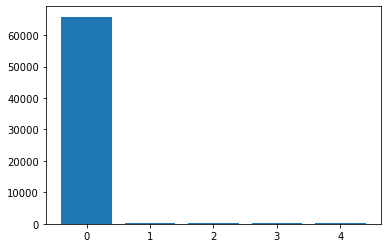

In [48]:
plt.bar(np.arange(5), counts.values[:5])
plt.show()

Since the second road number represents the number of the road at which the second car hit the first car, and it is missing when we are not at a junction, so it makes sense to impute it with the first road number when we are not at a junction **(MNAR)**

In [49]:

# picking accidents that do not have 2nd road number

mask1 = df['second_road_number'].isna()


# see what was the 1st road number for those entries

missing = df.loc[mask1, 'first_road_number']



# impute the missing 2nd road no. 
# with the corresponding 1st road no.

df.loc[mask1, 'second_road_number'] = missing

In [50]:
df['second_road_number'].isna().sum()

0

Check distribution again..

In [51]:
counts = df.second_road_number.value_counts()
print(counts)

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     88302
1                                                                                                         951
6                                                                                                         739
25                                                                                                        595
4                                                                                                         583
                                                                                                        ...  
881                                                                                                         1
4576.0                                                                                                      1
3283                                                                                                        1
4356      

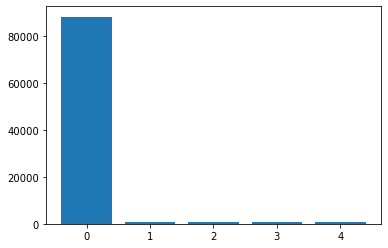

In [52]:
plt.bar(np.arange(5), counts.values[:5])
plt.show()

since most of the values of the 1st road number had the value "unclassified", the 2nd road number had now also "unclassified" as the most frequent category.

<br>

***

<br>

### Missing 2: "weather_conditions"


Let's check the distribution of weather conditions..

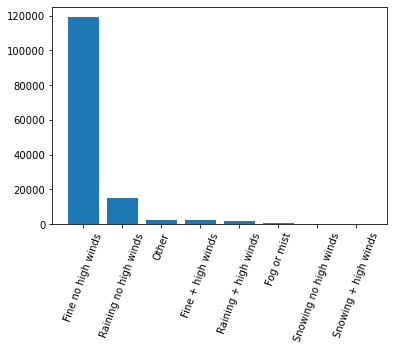

In [53]:
plot_distribution("weather_conditions", df)

Lets see how the road_surface_conditions vary with the weather conditions 

In [54]:
df[df['weather_conditions'].isna()][['weather_conditions','road_surface_conditions']]

,weather_conditions,road_surface_conditions
835,NaN,Dry
836,NaN,Dry
837,NaN,Dry
852,NaN,Dry
937,NaN,Dry
...,...,...
150869,NaN,Wet or damp
150970,NaN,Dry
151116,NaN,Wet or damp
151141,NaN,Wet or damp


In [55]:
df['weather_conditions'].unique()

array(['Raining no high winds', 'Fine no high winds', 'Other',
       'Fine + high winds', 'Raining + high winds', nan,
       'Snowing no high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

In [56]:
df.groupby('road_surface_conditions')['weather_conditions'].value_counts(normalize = True)


road_surface_conditions       weather_conditions   
Data missing or out of range  Fine no high winds       0.567164
                              Other                    0.417910
                              Fine + high winds        0.014925
Dry                           Fine no high winds       0.977405
                              Fine + high winds        0.015452
                              Other                    0.004727
                              Fog or mist              0.001175
                              Raining no high winds    0.000992
                              Raining + high winds     0.000202
                              Snowing no high winds    0.000048
Flood over 3cm. deep          Raining no high winds    0.522124
                              Raining + high winds     0.256637
                              Fine no high winds       0.168142
                              Fine + high winds        0.026549
                              Other                 

To keep the distribution unchanged, we will pick samples with the same probability as they occur in the dataset
so for example, when the road surface was dry, 97% of the time the weather was Fine with No high winds.

when we see a row that has dry road surface and missing weather conditions, it makes sense to fill that na with Fine weather 97% of the time.

In [57]:

# categories before filling NaNs

catgs_before_impute = df.groupby('road_surface_conditions')\
                        ['weather_conditions'].value_counts(normalize = True)



# conditions per category

conditions = df[df['weather_conditions'].isna()]['road_surface_conditions'].values



missing_weather_conds = []

for cond in conditions:
    
    # pick a weather condition based on the probability they occur with
    
    missing_weather_conds.append(np.random.choice(catgs_before_impute[cond].index,
                                                  p=catgs_before_impute[cond].values))

    
# fill nans based on the picked categories

df.loc[df['weather_conditions'].isna(), 'weather_conditions'] = missing_weather_conds




Check if the nans in the weather condition column were filled 

In [58]:

df.isna().mean()


accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
longitude                                      0.000000
latitude                                       0.000000
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0.000000
first_road_number                              0.000000
road_type                                      0

Yes, nans % in weather conditions became 0

#### Check if the distribution changed

In [59]:
catgs_after_impute = df.groupby('road_surface_conditions')\
                        ['weather_conditions'].value_counts(normalize = True)


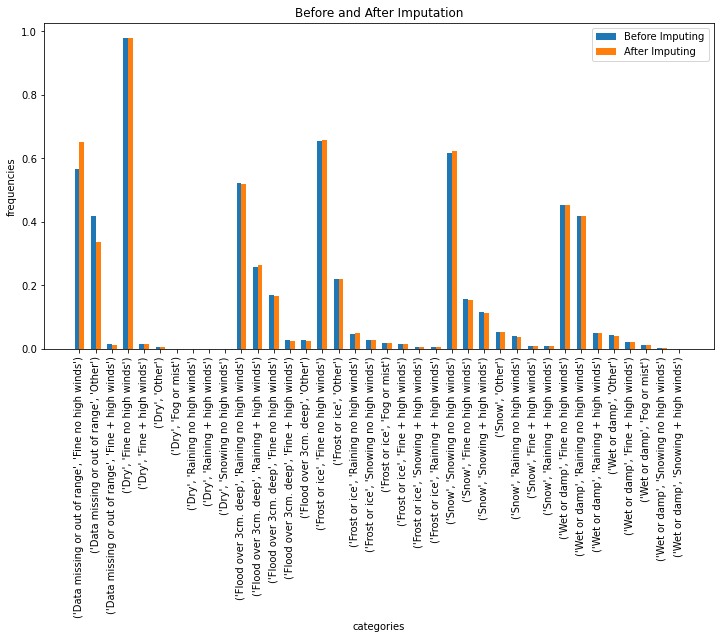

In [60]:
# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = catgs_before_impute.values

# Specify the values of orange bars (height)
orange_bar = catgs_after_impute.values

# Position of bars on x-axis
ind = np.arange(len(catgs_before_impute))

# Figure size
plt.figure(figsize=(12,6))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Before Imputing')
plt.bar(ind + width, orange_bar, width, label='After Imputing')

plt.xlabel('categories')
plt.ylabel('frequencies')
plt.title('Before and After Imputation')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, catgs_after_impute.index , rotation = 90)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### ..almost no change in the distribution!!

#### We can feel good about the way we imputed the missing entries.

<br>

***

<br>

### Missing 3: "road_type"

Let's check distribution..

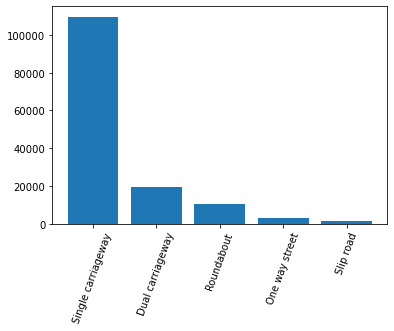

In [61]:
plot_distribution("road_type", df)

In [62]:
df['road_type'].unique()

array(['Single carriageway', 'Roundabout', 'One way street',
       'Dual carriageway', 'Slip road', nan], dtype=object)

In [63]:
df['road_type'].isna().mean()

0.0049140558585083665

only 0.4% of the values are missing so we can drop them (Complete Case Analysis)

In [64]:
df.dropna(inplace = True)

In [65]:
df.isna().mean()

accident_index                                 0.0
accident_year                                  0.0
accident_reference                             0.0
longitude                                      0.0
latitude                                       0.0
police_force                                   0.0
accident_severity                              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
date                                           0.0
day_of_week                                    0.0
time                                           0.0
local_authority_district                       0.0
local_authority_ons_district                   0.0
local_authority_highway                        0.0
first_road_class                               0.0
first_road_number                              0.0
road_type                                      0.0
speed_limit                                    0.0
junction_detail                

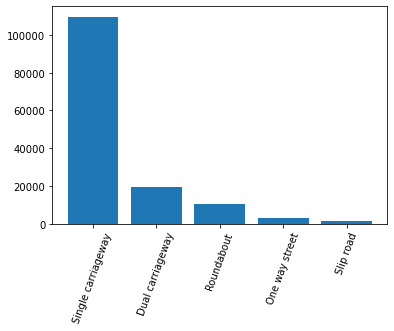

In [66]:
plot_distribution("road_type", df)

<br>

***

<br>

### Missing 4: First and Second Road Number

In [67]:
df['second_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     87791
1                                                                                                         950
6                                                                                                         737
25                                                                                                        593
4                                                                                                         582
                                                                                                        ...  
6031.0                                                                                                      1
881                                                                                                         1
4576.0                                                                                                      1
3283      

In [68]:
df['first_road_number'].value_counts()

first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero     54122
1                                                                                                        1506
6                                                                                                        1371
4                                                                                                        1280
40                                                                                                        839
                                                                                                        ...  
6456                                                                                                        1
4315                                                                                                        1
5382                                                                                                        1
5315      

we will replace the missing categroy by 0 to act as an indicator

In [69]:
category = "first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero "


df['first_road_number'] = df['first_road_number'].replace([category],0)


df['second_road_number'] = df['second_road_number'].replace([category],0)

df['first_road_number'].value_counts()

0       54122
1        1506
6        1371
4        1280
40        839
        ...  
6285        1
6198        1
6291        1
1330        1
3017        1
Name: first_road_number, Length: 3284, dtype: int64

#### So all missing values have been handled

<br>
<br>

***
***
***
<br>
<br>

# Section III: Adding New Features

## Feature 1: Week Number

In [70]:
week_map = {'Monday' : 0,
            'Tuesday' : 1,
            'Wednesday' : 2,
            'Thursday' : 3,
            'Friday' : 4,
            'Saturday': 5,
            'Sunday' : 6}
            
df['day_number'] = df['day_of_week'].replace(week_map)

df.head()

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,extracted_reference,day_number
0,201101BS70001,2011,01BS70001,-0.192203,51.495766,Metropolitan Police,Slight,1,1,2011-01-13,...,Raining no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002812,01BS70001,3
1,201101BS70002,2011,01BS70002,-0.165408,51.495710,Metropolitan Police,Serious,2,1,2011-11-01,...,Fine no high winds,Wet or damp,None,None,Urban,Yes,Non-trunk,E01002819,01BS70002,1
2,201101BS70003,2011,01BS70003,-0.170401,51.489763,Metropolitan Police,Slight,1,1,2011-01-19,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002914,01BS70003,2
3,201101BS70005,2011,01BS70005,-0.194856,51.497875,Metropolitan Police,Slight,2,3,2011-01-25,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002813,01BS70005,1
4,201101BS70007,2011,01BS70007,-0.182783,51.482671,Metropolitan Police,Slight,2,1,2011-06-01,...,Fine no high winds,Wet or damp,None,None,Urban,No,Non-trunk,E01002913,01BS70007,3


In [71]:
df['week_number'] = df['date'].apply(lambda x : x.isocalendar()[1])
df['week_number'].head()

0     2
1    44
2     3
3     4
4    22
Name: week_number, dtype: int64

the previous cell gets the week number starting from the beginning of the year

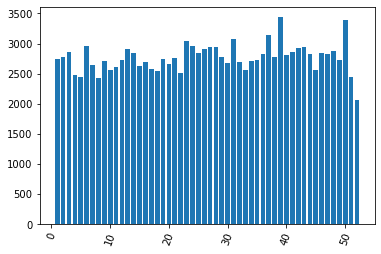

In [72]:
## Now we check the distribution of the week field..

plot_distribution("week_number", df)

<br>

***
***
<br>

## Feature 2: Adding a "Season" column

we will divide the date coulmn into 4 seasons (disceretize the date column)

<BarContainer object of 4 artists>

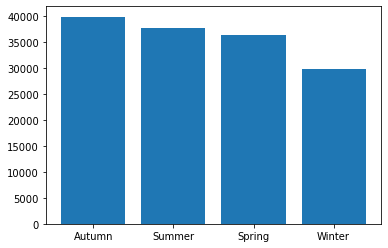

In [73]:
disceretize_date(df, 'date', 'season')

seasons = df['season'].value_counts()

plt.bar(seasons.index, seasons.values)

## Feature 2: Adding a "is_weekend" column

In [74]:
df['is_weekend'] = df['day_number']\
                        .apply(lambda x : 1 if x in [4,5,6] else 0)

df['is_weekend'].value_counts()

0    86125
1    57851
Name: is_weekend, dtype: int64

In [75]:
print(df['day_of_week'][151469], df['is_weekend'][151469])
print(df['day_of_week'][1], df['is_weekend'][1])

Saturday 1
Tuesday 0


as expected, Saturday is weekend so got 1, and Tuesday is not so got 0

<br>
<br>

***
***
***
<br>
<br>

# Section IV: Questions and Insight into Data

## Q1: Was the speed limit appropriate (in terms of the severity) for the location (rural or urban)?

In [76]:
df[df['urban_or_rural_area'] == 'Rural']['speed_limit'].value_counts()

60.0    19955
30.0    11832
70.0     7851
40.0     5224
50.0     3418
20.0      153
Name: speed_limit, dtype: int64

In [77]:
avg_speed_per_area = df.groupby(['urban_or_rural_area'])['speed_limit'].mean()
avg_speed_per_area

urban_or_rural_area
Rural    51.302831
Urban    31.574893
Name: speed_limit, dtype: float64

In [78]:
sever_vs_speed_lm = df.groupby(['urban_or_rural_area','accident_severity'])['speed_limit'].mean()
sever_vs_speed_lm

urban_or_rural_area  accident_severity
Rural                Fatal                56.256517
                     Serious              52.048611
                     Slight               51.037080
Urban                Fatal                33.407155
                     Serious              31.519780
                     Slight               31.569889
Name: speed_limit, dtype: float64

In [79]:

#plt.bar(x = sever_vs_speed_lm.index, height = sever_vs_speed_lm.values)

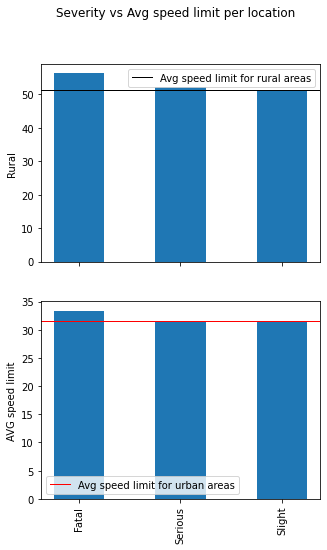

In [80]:

fig, ax = plt.subplots(2, sharex= True, figsize = (5, 8))

width = 0.5       






rural = sever_vs_speed_lm['Rural'].values

urban = sever_vs_speed_lm['Urban'].values

x_positions = np.arange(len(sever_vs_speed_lm['Rural']))






# Upper Figure (Rural areas)

ax[0].bar(x_positions + width, rural , width)

ax[0].axhline(y=avg_speed_per_area[0],
              linewidth=1,
              color='k',
              label= 'Avg speed limit for rural areas')

ax[0].set(ylabel = 'Rural')

ax[0].legend()






# Lower Figure (Urban areas)


ax[1].bar(x_positions + width, urban, width)


ax[1].axhline(y=avg_speed_per_area[1],
              linewidth=1,
              color='r',
              label= 'Avg speed limit for urban areas')

ax[1].set(ylabel = 'Urban')

ax[1].legend()



#--------------------------------------------

ax[1].set(ylabel='AVG speed limit')

plt.suptitle('Severity vs Avg speed limit per location')


plt.xticks(x_positions + width, sever_vs_speed_lm['Rural'].index , rotation = 90)

plt.show()

It seems the accident was sever when the speed limit of the area exceeded the average speed limit for that area, but we can see that, following the speed limit (as in the case for Serious and Slight accidents) did not prevent accidents.

In other words, Rural Areas should have an average speed limit of 50 mph so setting the speed limit of some rural areas to be 70 may cause accidents to be Fatal.

<br>

***
***
<br>

## Q2:  What was the relation between the time and the accident severity?

In [81]:
df['local_authority_district'].value_counts()

Birmingham                   2377
Leeds                        1820
Westminster                  1445
Cornwall                     1306
Manchester                   1292
                             ... 
Clackmannanshire               60
Western Isles                  34
Shetland Islands               30
London Airport (Heathrow)      24
Orkney Islands                 11
Name: local_authority_district, Length: 380, dtype: int64

In [82]:
df.groupby(['local_authority_district', 'time'])['accident_severity'].value_counts()

local_authority_district  time   accident_severity
Aberdeen City             00:00  Serious              1
                                 Slight               1
                          00:01  Serious              1
                          00:15  Serious              1
                          00:30  Slight               2
                                                     ..
York                      23:14  Slight               1
                          23:20  Slight               1
                          23:46  Slight               1
                          23:48  Slight               1
                          23:50  Slight               1
Name: accident_severity, Length: 97813, dtype: int64

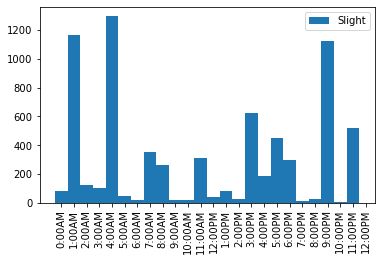

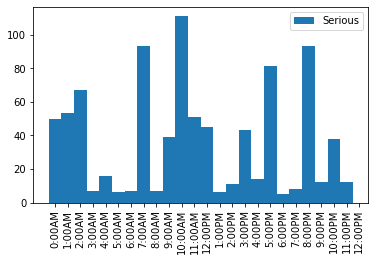

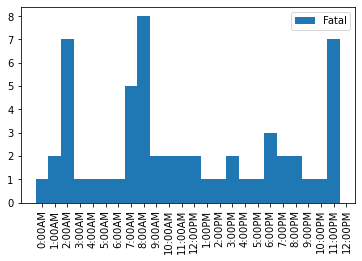

In [83]:
for status in df['accident_severity'].unique():
    time = df[df['accident_severity'] == status]['time']
    plot_time_distribution(time, status)
    

it seems that most of the fatal accidents occur between 8:00 AM and 10:00 AM then at 3:00 AM
same case for serious accidents. However, slight accidents occur mainly between 00:00 AM to 4:00 AM and between 8:00 and 9:00 PM

<br>

***
***
<br>

## Q3: Relation between road type and number of vehicles and number of casualties


In [84]:
df.groupby('road_type')['number_of_vehicles'].mean()

road_type
Dual carriageway      1.850598
One way street        1.556001
Roundabout            1.898406
Single carriageway    1.732749
Slip road             1.835302
Name: number_of_vehicles, dtype: float64

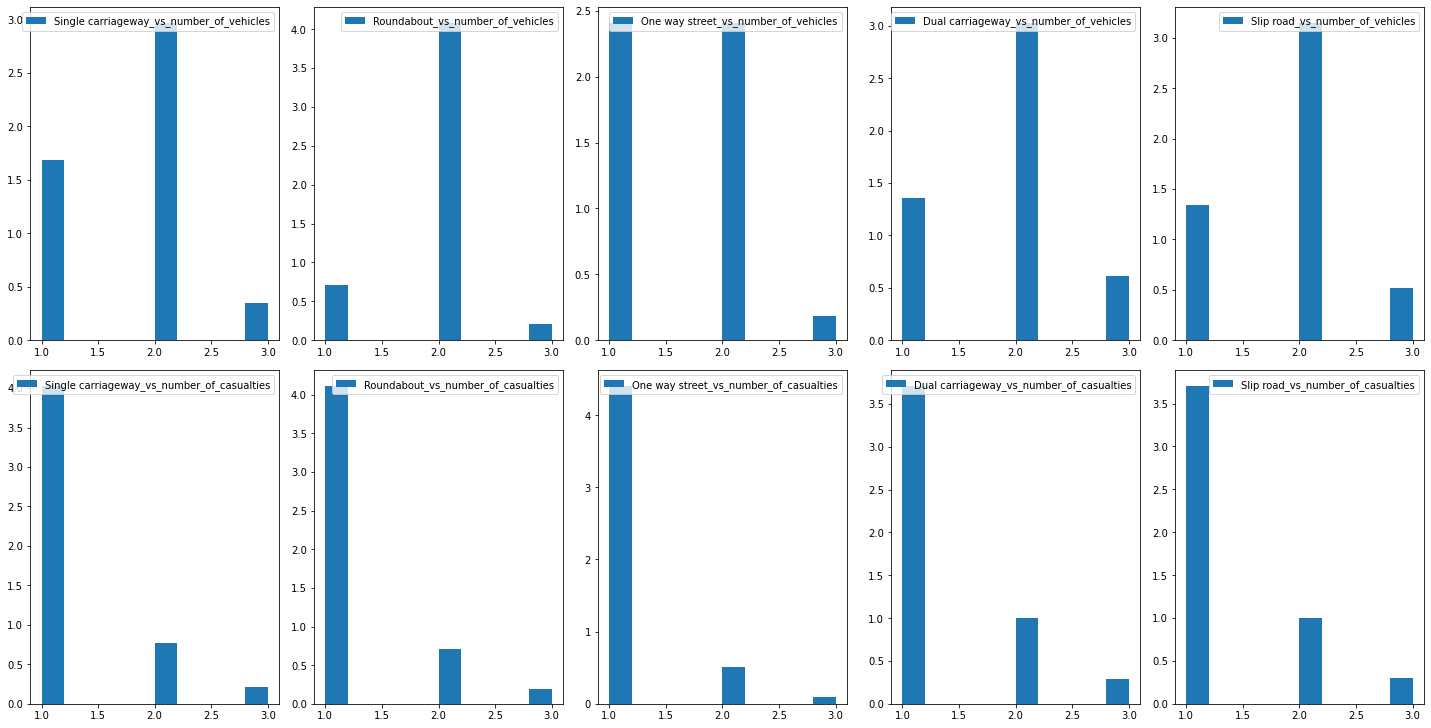

In [85]:
variables = ['number_of_vehicles', 'number_of_casualties']

road_types = df['road_type'].unique()




figure, axis = plt.subplots(len(variables),
                            len(road_types) ,
                            figsize=(20,10) ,
                            constrained_layout=True)



for i in range(len(variables)):
    for j in range(len(road_types)):
        plot_dist(axis[i, j], road_types[j] , variables[i])


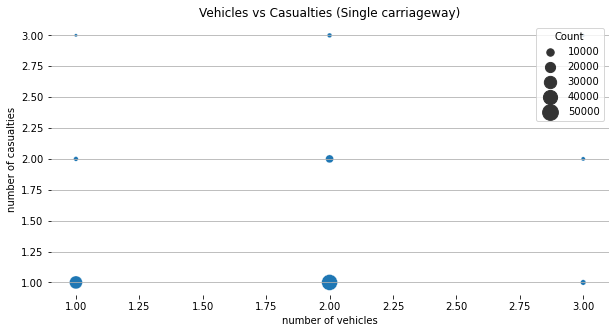

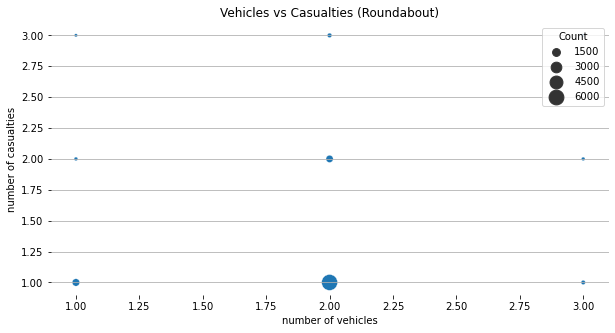

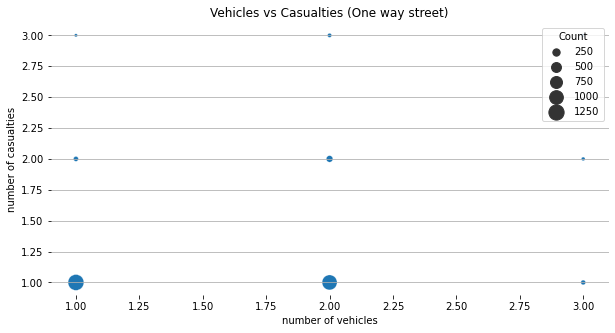

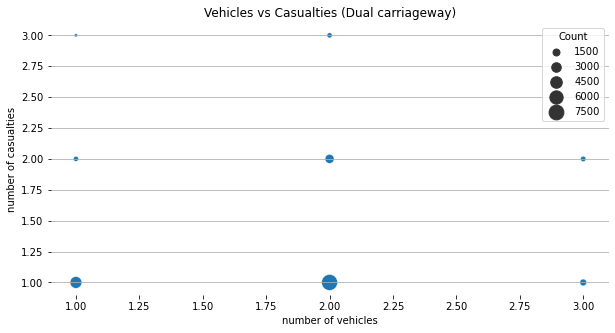

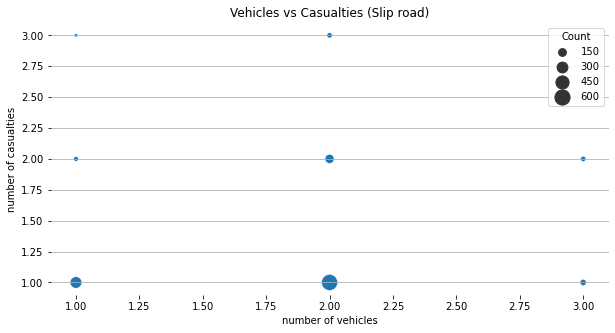

In [86]:
for rt in df['road_type'].unique(): 
    df_slice = df[df['road_type']== rt]
    
    x = 'number_of_vehicles'
    y = 'number_of_casualties'
    
    counts = df_slice.groupby([x, y]).size().reset_index(name='Count')

    fig, ax = plt.subplots(figsize=(10, 5))
    
    
    sns.scatterplot(data=counts,
                    x=x,
                    y=y,
                    size='Count',
                    ax=ax,
                    sizes = (10, 250))
    
    ax.grid(axis='y')
    
    sns.despine(left=True, bottom=True)
    
    
    plt.xlabel('number of vehicles')
    plt.ylabel('number of casualties')
    plt.title('Vehicles vs Casualties ({})'.format(rt))
    plt.show()

the above graph shows a reasonable insight, the number of vehicles involved is related to the number of causalities <br>
so for example, when 2 vehicles are involved, at least 2 casualties were affected (the 2 drivers)

In [87]:
df['number_of_casualties'].unique()

array([1, 3, 2], dtype=int64)

<br>

***
***
<br>

## Q4: Is the severity of accidents related to weather condtions?

In [88]:
df.weather_conditions.value_counts(normalize=True)

Fine no high winds       0.839279
Raining no high winds    0.105156
Other                    0.018232
Fine + high winds        0.016760
Raining + high winds     0.012933
Fog or mist              0.004362
Snowing no high winds    0.002750
Snowing + high winds     0.000528
Name: weather_conditions, dtype: float64

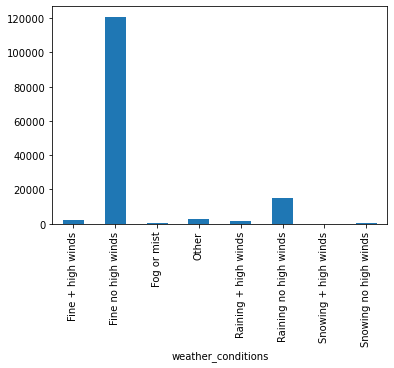

In [89]:
acc_count=df.groupby(df.weather_conditions).accident_severity.count().plot(kind = 'bar')

### most of the accidents occur in fine and no high wind with 83%

We beleive that most of the accidents occur under these conditions, because the weather in UK is mainly fine with no high winds

<br>

***
***
<br>

## Q5: Correlation between time and number of vehicles

In [90]:
df['date']= pd.to_datetime(df['date'], format="%d/%m/%Y")

In [91]:
# slice first and second string from time column
df['hour'] = df.time.str[0:2]

# convert new column to numeric datetype
df['hour'] = pd.to_numeric(df['hour'])

# cast to integer values
df['hour'] = df['hour'].astype('int')

In [92]:
# apply thus function to our temporary hour column
# prepare dataframe
labels_hours = ['night (0 - 5)',
                'morning rush (5 - 10)',
                'office hours (10 - 15)',
                'afternoon rush (15 - 19)',
                 'evening (19 - 23)']


df['daytimegroup'] = df['hour'].apply(categorize_hour)
df[['time', 'hour', 'daytimegroup']].head(15)

,time,hour,daytimegroup
0,16:54,16,afternoon rush (15 - 19)
1,19:45,19,evening (19 - 23)
2,17:30,17,afternoon rush (15 - 19)
3,23:40,23,night (0 - 5)
4,06:20,6,morning rush (5 - 10)
5,17:00,17,afternoon rush (15 - 19)
6,07:53,7,morning rush (5 - 10)
7,23:18,23,night (0 - 5)
8,10:50,10,office hours (10 - 15)
9,07:00,7,morning rush (5 - 10)


In [93]:
df.accident_severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

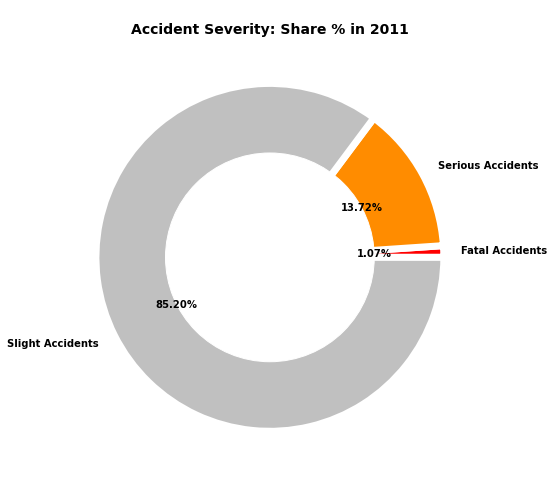

In [94]:
# assign the data
severity_table = df.accident_severity.value_counts()

fatal   = severity_table['Fatal']
serious = severity_table['Serious']
slight  = severity_table['Slight']

names = ['Fatal Accidents',
         'Serious Accidents',
         'Slight Accidents']

size  = [fatal, serious, slight]

# create a pie chart
plt.pie(x=size, labels=names,
        colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6,
        textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share % in 2011', fontsize=14, fontweight='bold')
plt.show()

In [95]:
# prepare dataframe with simple counts
counts = df.groupby(['daytimegroup', 'accident_severity']).size()

counts = counts.rename_axis(['daytimegroup', 'accident_severity'])\
                                .unstack('accident_severity')\
                                .rename({1:'fatal', 2:'serious', 3:'slight'}, axis='columns')
counts

accident_severity,Fatal,Serious,Slight
daytimegroup,,,
afternoon rush (15 - 19),371,6332,39463
evening (19 - 23),291,2974,17040
morning rush (5 - 10),257,3540,24242
night (0 - 5),247,1695,7523
office hours (10 - 15),380,5217,34404


In [96]:
# prepare dataframe with shares
counts['sum'] = counts.sum(axis=1)
counts = counts.join(counts.div(counts['sum'], axis=0),
                     rsuffix=' in %')
counts_share = counts.drop(columns=['Fatal',
                                    'Serious',
                                    'Slight',
                                    'sum',
                                    'sum in %'], axis=1)
counts_share

accident_severity,Fatal in %,Serious in %,Slight in %
daytimegroup,,,
afternoon rush (15 - 19),0.008036,0.137157,0.854807
evening (19 - 23),0.014331,0.146466,0.839202
morning rush (5 - 10),0.009166,0.126253,0.864581
night (0 - 5),0.026096,0.179081,0.794823
office hours (10 - 15),0.009500,0.130422,0.860078


[Text(0, 0.5, 'Total Count of Accidents'), Text(0.5, 0, 'Hour of the Day')]

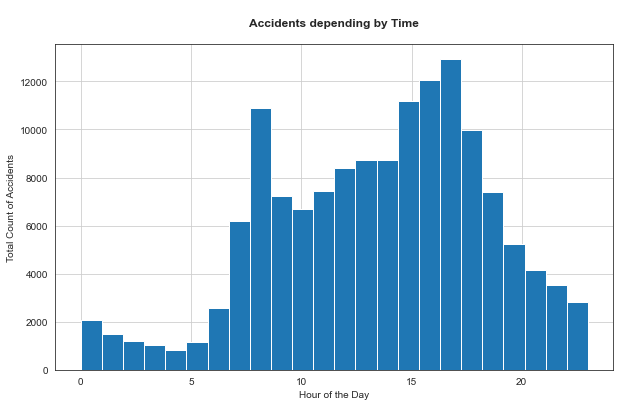

In [97]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
df.hour.hist(bins=24, ax=ax)
ax.set_title('\nAccidents depending by Time\n',
             fontsize=12,
             fontweight='bold')

ax.set(xlabel='Hour of the Day',
       ylabel='Total Count of Accidents')


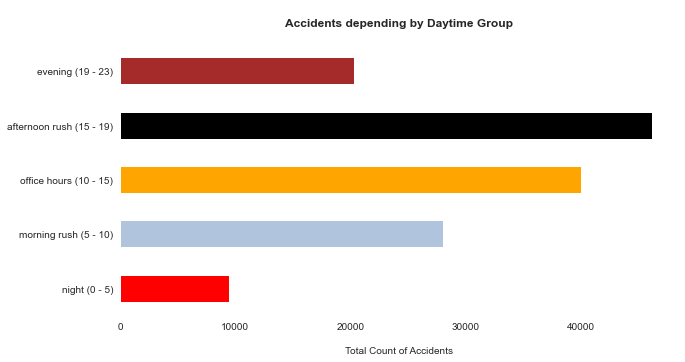

In [98]:


df_sub = df.groupby('daytimegroup').size().reindex(labels_hours)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['red',
          'lightsteelblue',
          'orange',
          'black',
          'brown']


# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime Group\n',
             fontsize=12,
             fontweight='bold')

ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

<br>

***
***
<br>

## Q6: Which type of junction is most affected by wet/damp street conditions & Which junction control type gives rise to accidents with the most number of vehicles?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

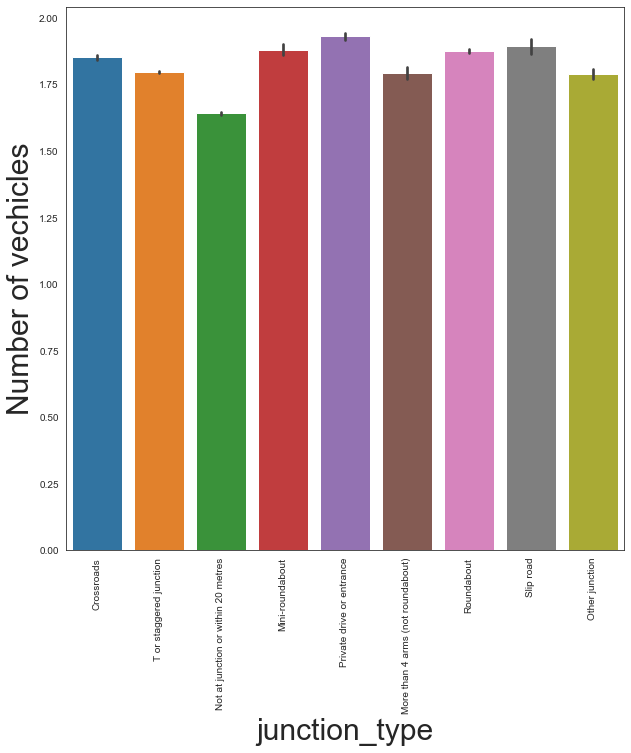

In [99]:
fig_dims = (10, 10)
fig= plt.subplots(figsize=fig_dims)
sns.barplot(x = "junction_detail", y = "number_of_vehicles", data = df)
plt.ylabel("Number of vechicles", fontsize = 30)
plt.xlabel("junction_type", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 10)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

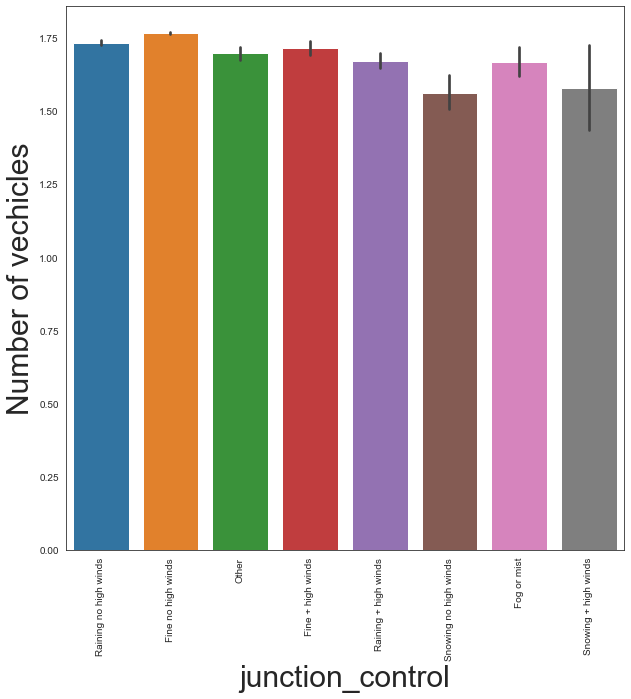

In [100]:
fig_dims = (10, 10)
fig= plt.subplots(figsize=fig_dims)
sns.barplot(x = "weather_conditions", y = "number_of_vehicles", data = df)
plt.ylabel("Number of vechicles", fontsize = 30)
plt.xlabel("junction_control", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 10)

<br>

***
***
<br>

## Q7: Which areas have the highest frequeny of accidents?

In [101]:
df_locations = df[['local_authority_district',
                   'local_authority_ons_district',
                   'local_authority_highway']]
df_locations.describe()

,local_authority_district,local_authority_ons_district,local_authority_highway
count,143976,143976,143976
unique,380,381,208
top,Birmingham,Birmingham,Kent
freq,2377,2377,3939


We have 3 fields that represent locations, we will use the 'local_aurhority_ons_district' since it has the largest number of areas and is thus the most generic.

In [102]:
auth_table = df.local_authority_ons_district.value_counts(normalize=True)

locations = auth_table[:10].index.tolist()

values = auth_table.mul(100)[:10].tolist()

Text(0, 0.5, '% of all accidents in UK (2011)')

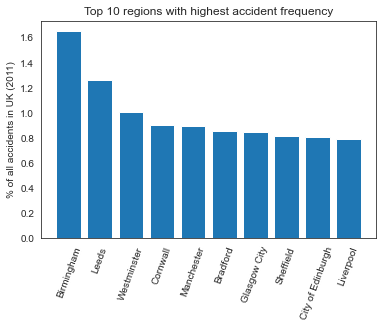

In [103]:
plt.bar(locations, values)
plt.xticks(rotation=70)
plt.title("Top 10 regions with highest accident frequency")
plt.ylabel("% of all accidents in UK (2011)")

### Just over 1.6% of all accidents in the UK occur in Birmingham.

<br>

***
***
<br>

## Q8: Are police officers more attentive/watchful (of accidents) in Urban or Rural areas?

We shall calculate the total % of accidents that were attended by police officers in both urban and rural areas.

In [104]:
df.urban_or_rural_area.value_counts()

Urban    95543
Rural    48433
Name: urban_or_rural_area, dtype: int64

In [105]:
df.did_police_officer_attend_scene_of_accident.value_counts()

Yes    115890
No      28086
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [106]:
mask = df.urban_or_rural_area == "Urban"
urban_slice = df[mask]
total_urban = urban_slice.urban_or_rural_area.value_counts()[0]
print(total_urban)

95543


In [107]:
mask = df.urban_or_rural_area == "Rural"
rural_slice = df[mask]
total_rural = rural_slice.urban_or_rural_area.value_counts()[0]
print(total_rural)

48433


In [108]:
mask = df.did_police_officer_attend_scene_of_accident == "Yes"
attentive_urban = urban_slice[mask].count()[0]
print(attentive_urban)

<ipython-input-108-9536a3a78c68>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attentive_urban = urban_slice[mask].count()[0]


73786


In [109]:
mask = df.did_police_officer_attend_scene_of_accident == "Yes"
attentive_rural = rural_slice[mask].count()[0]
print(attentive_rural)

42104


<ipython-input-109-e1ba2767ccc5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  attentive_rural = rural_slice[mask].count()[0]


Text(0, 0.5, '% accidents attended by polic officers')

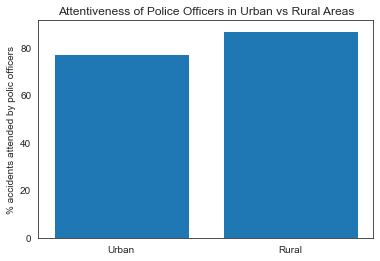

In [110]:
perc_attentive_urban = 100*attentive_urban/total_urban
perc_attentive_rural = 100*attentive_rural/total_rural

perc_attentive = [perc_attentive_urban, perc_attentive_rural]
labels = ["Urban", "Rural"]

plt.bar(labels, perc_attentive)
plt.title("Attentiveness of Police Officers in Urban vs Rural Areas")
plt.ylabel("% accidents attended by polic officers")

### Police officers are more attentive in rural areas.

<br>

***
***
<br>

## Q9: Is the chance of accidents happening in some of the listed areas affected by the day of the week?

In this analysis, we want to find out if accident frequencies rises in a certain day of the week in some areas. This will help us to know if a certian problem happens regularly on the same day of the week in some areas.

First let's think about the theoretical maximum frequency if accidents per day of week is uniformly distibuted.

In [111]:
## theoretical max frequency if days of week uniformly distibuted

## since we have 7 days of the week.. the frequency of each day will be..

x = 1/7
print(x)

## the maximum day frequnecy will equal the uniform distributed frequency which is 1/7

0.14285714285714285


### Now, we will calculate the maximum frequency in the (day of week) column for each of listed areas. A value much higher than (1/7) will indicate a skew towards a certain day of the week.

In [112]:
df_locations = df.local_authority_ons_district.value_counts()
print(df_locations)

Birmingham                   2377
Leeds                        1820
Westminster                  1445
Cornwall                     1305
Manchester                   1292
                             ... 
Comhairle nan Eilean Siar      34
Shetland Islands               30
London Airport (Heathrow)      24
Orkney Islands                 11
Isles of Scilly                 1
Name: local_authority_ons_district, Length: 381, dtype: int64


### We will exclude locations with less than 200 total accidents, like Isles of Scilly which has only 1 accident.

In [113]:
mask = df_locations > 199
print(mask)
df_locations = df_locations[mask]
print(df_locations)

Birmingham                    True
Leeds                         True
Westminster                   True
Cornwall                      True
Manchester                    True
                             ...  
Comhairle nan Eilean Siar    False
Shetland Islands             False
London Airport (Heathrow)    False
Orkney Islands               False
Isles of Scilly              False
Name: local_authority_ons_district, Length: 381, dtype: bool
Birmingham                 2377
Leeds                      1820
Westminster                1445
Cornwall                   1305
Manchester                 1292
                           ... 
Staffordshire Moorlands     205
Mid Suffolk                 203
Bolsover                    203
South Hams                  201
Rushmoor                    200
Name: local_authority_ons_district, Length: 299, dtype: int64


### We create 4 lists to hold the locations, their accident count, the maximum day and the frequency of that maximum day.

In [114]:
locations = df_locations.index.tolist()
values = df_locations.tolist()

## create empty list of same size to hold the variances to be calculated
DOW_max_frequency = [None] * len(values)
which_day = [None] * len(values)

### The theoretical uniform distributed frequency is (0.143).. it represents equal accident distribution across days of the week.

### If accidents occur more frequently in a certain day.. this "maximum frequency" calculation for that location will be higher than 0.143.

### Now, we will observe the locations with the highest "maximum frequency" and see this "maximum frequency" corresponds to which day of the week.

In [115]:
for i in range(len(values)):
    mask = (df.local_authority_ons_district == locations[i])
    df_temp = df[mask].day_of_week
    total_len = len(df_temp)
    max_day_count = df_temp.value_counts()[0]
    mode = df_temp.mode()
    which_day[i] = mode
    max_freq = max_day_count / total_len
    DOW_max_frequency[i] = max_freq


Now the frequency of the most common day for accidents for each location is stored in the DOW_max_frequency list.

We will observer the days with the highest max_frequency.. The higher the max frequency above 0.143 (14.3%) the higher the skew.. this indicates a rise in accidents in that day of the week.

In [116]:
max = DOW_max_frequency[0]
index = 0
for i in range(1,len(DOW_max_frequency)):
    if DOW_max_frequency[i] > max:
        max = DOW_max_frequency[i]
        index = i

In [117]:
print(index)
print(locations[index])
print(values[index])
print(DOW_max_frequency[index])
print(which_day[index])

248
Waveney
244
0.2459016393442623
0    Friday
dtype: object


In [118]:
mask = df.local_authority_ons_district == "Waveney"
lol = df[mask]
lol.day_of_week.value_counts()

Friday       60
Thursday     39
Monday       38
Wednesday    35
Sunday       27
Tuesday      23
Saturday     22
Name: day_of_week, dtype: int64

### In Waveney, around 25% of all 244 accidents occured on a Friday, this is very unlikely to be a statistical anomaly, this means that a certain problem occurs in Waveney on Friday that causes a rise in the probability of an accident occuring.

<br>
<br>

***
***
***
<br>
<br>

# Section V: Encoding Categorical Variables

## Encoding 1: Label Encoding

We shall now define a general method that iterates over a list of fields 'x' and encodes them using Integer/Label encoding.

Here are the fields that will be encoded using Integer/Label encoding:

- police
- severity
- day_of_the_week
- junction control
- junction detail
- weather
- road_surface
- urban_or_rural
- did police attend
- light

In [119]:
df.head(10)

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,extracted_reference,day_number,week_number,season,is_weekend,hour,daytimegroup
0,201101BS70001,2011,01BS70001,-0.192203,51.495766,Metropolitan Police,Slight,1,1,2011-01-13,...,Yes,Non-trunk,E01002812,01BS70001,3,2,Winter,0,16,afternoon rush (15 - 19)
1,201101BS70002,2011,01BS70002,-0.165408,51.495710,Metropolitan Police,Serious,2,1,2011-11-01,...,Yes,Non-trunk,E01002819,01BS70002,1,44,Autumn,0,19,evening (19 - 23)
2,201101BS70003,2011,01BS70003,-0.170401,51.489763,Metropolitan Police,Slight,1,1,2011-01-19,...,Yes,Non-trunk,E01002914,01BS70003,2,3,Winter,0,17,afternoon rush (15 - 19)
3,201101BS70005,2011,01BS70005,-0.194856,51.497875,Metropolitan Police,Slight,2,3,2011-01-25,...,Yes,Non-trunk,E01002813,01BS70005,1,4,Winter,0,23,night (0 - 5)
4,201101BS70007,2011,01BS70007,-0.182783,51.482671,Metropolitan Police,Slight,2,1,2011-06-01,...,No,Non-trunk,E01002913,01BS70007,3,22,Spring,0,6,morning rush (5 - 10)
5,201101BS70008,2011,01BS70008,-0.159617,51.492831,Metropolitan Police,Slight,1,1,2011-01-24,...,Yes,Non-trunk,E01002859,01BS70008,0,4,Winter,0,17,afternoon rush (15 - 19)
6,201101BS70009,2011,01BS70009,-0.177609,51.486008,Metropolitan Police,Slight,1,1,2011-01-27,...,Yes,Non-trunk,E01002911,01BS70009,3,4,Winter,0,7,morning rush (5 - 10)
7,201101BS70010,2011,01BS70010,-0.188656,51.494362,Metropolitan Police,Slight,1,1,2011-01-27,...,Yes,Non-trunk,E01002839,01BS70010,3,4,Winter,0,23,night (0 - 5)
8,201101BS70011,2011,01BS70011,-0.215222,51.526064,Metropolitan Police,Serious,2,1,2011-01-28,...,Yes,Non-trunk,E01002852,01BS70011,4,4,Winter,1,10,office hours (10 - 15)
9,201101BS70012,2011,01BS70012,-0.194120,51.494627,Metropolitan Police,Slight,2,1,2011-01-25,...,Yes,Non-trunk,E01002850,01BS70012,1,4,Winter,0,7,morning rush (5 - 10)


We create a list:

In [120]:
cols = ["accident_severity", "junction_control",
        "junction_detail",
        "weather_conditions",
        "road_surface_conditions",
        "urban_or_rural_area",
        "light_conditions"]

In [121]:
## Create mappings (lookup table) as well as inverse mappings (inverse lookup table)

mappings = {}

for col in cols:
    elements = df[col].unique()
    mappings[col] = dict(zip(elements,
                         range(1,len(elements)+1)))
    
    




In [122]:
print(mappings)

{'accident_severity': {'Slight': 1, 'Serious': 2, 'Fatal': 3}, 'junction_control': {'Give way or uncontrolled': 1, 'Data missing or out of range': 2, 'Auto traffic signal': 3, 'Authorised person': 4, 'Stop sign': 5}, 'junction_detail': {'Crossroads': 1, 'T or staggered junction': 2, 'Not at junction or within 20 metres': 3, 'Mini-roundabout': 4, 'Private drive or entrance': 5, 'More than 4 arms (not roundabout)': 6, 'Roundabout': 7, 'Slip road': 8, 'Other junction': 9}, 'weather_conditions': {'Raining no high winds': 1, 'Fine no high winds': 2, 'Other': 3, 'Fine + high winds': 4, 'Raining + high winds': 5, 'Snowing no high winds': 6, 'Fog or mist': 7, 'Snowing + high winds': 8}, 'road_surface_conditions': {'Wet or damp': 1, 'Dry': 2, 'Frost or ice': 3, 'Snow': 4, 'Flood over 3cm. deep': 5, 'Data missing or out of range': 6}, 'urban_or_rural_area': {'Urban': 1, 'Rural': 2}, 'light_conditions': {'Darkness - lights lit': 1, 'Daylight': 2, 'Darkness - no lighting': 3, 'Darkness - lighting 

In [123]:
## use mappings lookup table to replace labels in original dataframe with integers

df = df.replace(mappings)

In [124]:
df.head(10)

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,extracted_reference,day_number,week_number,season,is_weekend,hour,daytimegroup
0,201101BS70001,2011,01BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,...,Yes,Non-trunk,E01002812,01BS70001,3,2,Winter,0,16,afternoon rush (15 - 19)
1,201101BS70002,2011,01BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,...,Yes,Non-trunk,E01002819,01BS70002,1,44,Autumn,0,19,evening (19 - 23)
2,201101BS70003,2011,01BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,...,Yes,Non-trunk,E01002914,01BS70003,2,3,Winter,0,17,afternoon rush (15 - 19)
3,201101BS70005,2011,01BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,...,Yes,Non-trunk,E01002813,01BS70005,1,4,Winter,0,23,night (0 - 5)
4,201101BS70007,2011,01BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,...,No,Non-trunk,E01002913,01BS70007,3,22,Spring,0,6,morning rush (5 - 10)
5,201101BS70008,2011,01BS70008,-0.159617,51.492831,Metropolitan Police,1,1,1,2011-01-24,...,Yes,Non-trunk,E01002859,01BS70008,0,4,Winter,0,17,afternoon rush (15 - 19)
6,201101BS70009,2011,01BS70009,-0.177609,51.486008,Metropolitan Police,1,1,1,2011-01-27,...,Yes,Non-trunk,E01002911,01BS70009,3,4,Winter,0,7,morning rush (5 - 10)
7,201101BS70010,2011,01BS70010,-0.188656,51.494362,Metropolitan Police,1,1,1,2011-01-27,...,Yes,Non-trunk,E01002839,01BS70010,3,4,Winter,0,23,night (0 - 5)
8,201101BS70011,2011,01BS70011,-0.215222,51.526064,Metropolitan Police,2,2,1,2011-01-28,...,Yes,Non-trunk,E01002852,01BS70011,4,4,Winter,1,10,office hours (10 - 15)
9,201101BS70012,2011,01BS70012,-0.194120,51.494627,Metropolitan Police,1,2,1,2011-01-25,...,Yes,Non-trunk,E01002850,01BS70012,1,4,Winter,0,7,morning rush (5 - 10)


In [125]:
df.carriageway_hazards.value_counts(normalize=True)

None                                               0.983622
Other object on road                               0.006070
Any animal in carriageway (except ridden horse)    0.005626
Pedestrian in carriageway - not injured            0.002584
Vehicle load on road                               0.001104
Previous accident                                  0.000993
Name: carriageway_hazards, dtype: float64

In [126]:
df.pedestrian_crossing_human_control.value_counts(normalize=True)

None within 50 metres                 0.994721
Control by school crossing patrol     0.002674
Control by other authorised person    0.002605
Name: pedestrian_crossing_human_control, dtype: float64

In [127]:
df.pedestrian_crossing_physical_facilities.value_counts(normalize=True)

No physical crossing facilities within 50 metres                             0.819928
Pedestrian phase at traffic signal junction                                  0.070637
Pelican, puffin, toucan or similar non-junction pedestrian light crossing    0.056280
Zebra                                                                        0.029526
Central refuge                                                               0.020531
Footbridge or subway                                                         0.003098
Name: pedestrian_crossing_physical_facilities, dtype: float64

In [128]:
df.trunk_road_flag.value_counts(normalize=True)

Non-trunk                                    0.826061
Data missing or out of range                 0.107469
Trunk (Roads managed by Highways England)    0.066469
Name: trunk_road_flag, dtype: float64

## Encoding 2: Frequency Encoding

In [129]:
df.head()

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,extracted_reference,day_number,week_number,season,is_weekend,hour,daytimegroup
0,201101BS70001,2011,01BS70001,-0.192203,51.495766,Metropolitan Police,1,1,1,2011-01-13,...,Yes,Non-trunk,E01002812,01BS70001,3,2,Winter,0,16,afternoon rush (15 - 19)
1,201101BS70002,2011,01BS70002,-0.165408,51.495710,Metropolitan Police,2,2,1,2011-11-01,...,Yes,Non-trunk,E01002819,01BS70002,1,44,Autumn,0,19,evening (19 - 23)
2,201101BS70003,2011,01BS70003,-0.170401,51.489763,Metropolitan Police,1,1,1,2011-01-19,...,Yes,Non-trunk,E01002914,01BS70003,2,3,Winter,0,17,afternoon rush (15 - 19)
3,201101BS70005,2011,01BS70005,-0.194856,51.497875,Metropolitan Police,1,2,3,2011-01-25,...,Yes,Non-trunk,E01002813,01BS70005,1,4,Winter,0,23,night (0 - 5)
4,201101BS70007,2011,01BS70007,-0.182783,51.482671,Metropolitan Police,1,2,1,2011-06-01,...,No,Non-trunk,E01002913,01BS70007,3,22,Spring,0,6,morning rush (5 - 10)


In [130]:
cols = ['police_force',
        'local_authority_district',
        'local_authority_ons_district',
        'local_authority_highway']


freq_encoding = {}


for col in cols:
    df[col], encoding = frequency_encode(df, col)
    
    freq_encoding[col] = encoding
    

In [131]:
df.head()

,accident_index,accident_year,accident_reference,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,extracted_reference,day_number,week_number,season,is_weekend,hour,daytimegroup
0,201101BS70001,2011,01BS70001,-0.192203,51.495766,0.16377,1,1,1,2011-01-13,...,Yes,Non-trunk,E01002812,01BS70001,3,2,Winter,0,16,afternoon rush (15 - 19)
1,201101BS70002,2011,01BS70002,-0.165408,51.495710,0.16377,2,2,1,2011-11-01,...,Yes,Non-trunk,E01002819,01BS70002,1,44,Autumn,0,19,evening (19 - 23)
2,201101BS70003,2011,01BS70003,-0.170401,51.489763,0.16377,1,1,1,2011-01-19,...,Yes,Non-trunk,E01002914,01BS70003,2,3,Winter,0,17,afternoon rush (15 - 19)
3,201101BS70005,2011,01BS70005,-0.194856,51.497875,0.16377,1,2,3,2011-01-25,...,Yes,Non-trunk,E01002813,01BS70005,1,4,Winter,0,23,night (0 - 5)
4,201101BS70007,2011,01BS70007,-0.182783,51.482671,0.16377,1,2,1,2011-06-01,...,No,Non-trunk,E01002913,01BS70007,3,22,Spring,0,6,morning rush (5 - 10)


## Encoding 3: Binary Encoding (ordinal encoding with rare labels)

In [132]:
binary_encoded_labels = ['pedestrian_crossing_human_control',
                        'pedestrian_crossing_physical_facilities',
                        'trunk_road_flag',
                        'carriageway_hazards',
                        'special_conditions_at_site',
                        'did_police_officer_attend_scene_of_accident']

binary_encoded_cats = ['None within 50 metres ',
                        'No physical crossing facilities within 50 metres',
                        'Non-trunk',
                        'None',
                        'None',
                        'NO']

bin_encoding = {}


for i in range(len(binary_encoded_cats)):
    col_name = binary_encoded_labels[i]
    category = binary_encoded_cats[i]
    table = binary_encode(df, col_name, category)
    bin_encoding[col_name] = table


<br>

***
***
<br>

## Normalization

lets have a look at numeric columns only

In [133]:
colnames_numerics_only = df.select_dtypes(include=np.number)\
                            .columns.tolist()

colnames_numerics_only

['accident_year',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'day_number',
 'week_number',
 'is_weekend',
 'hour']

In [134]:
for col in colnames_numerics_only:
    print(df[col].min(), df[col].max())

2011 2011
-7.5074679999999985 1.759382
49.920895 60.662043
0.0021392454297938547 0.16377035061399123
1 3
1 3
1 3
7.640162249263767e-05 0.01650969606045452
6.945602044785242e-06 0.01650969606045452
6.945602044785242e-06 0.02735872645440907
20.0 70.0
1 9
1 5
0 1
0 1
1 5
1 8
1 6
0 1
0 1
1 2
1 1
0 1
0 6
1 52
0 1
0 23


all columns have same order of magnitude (difference between max and min is 10)
except for :- <br>
- latitude
- week number
- hour
- speed limit

We will apply the max-min normalization on the latitude as it is bounded between 49 and 52
and apply standardization on the rest of the numeric variables to reduce their variance

In [137]:
normalise_minmax(df, 'latitude')

for col in ['week_number', 'hour', 'speed_limit']:
    normalise_std(df, col)

In [138]:
for col in colnames_numerics_only:
    print(df[col].min(), df[col].max())

2011 2011
-7.5074679999999985 1.759382
0.0 1.0
0.0021392454297938547 0.16377035061399123
1 3
1 3
1 3
7.640162249263767e-05 0.01650969606045452
6.945602044785242e-06 0.01650969606045452
6.945602044785242e-06 0.02735872645440907
-1.3342885958308786 2.329065094941142
1 9
1 5
0 1
0 1
1 5
1 8
1 6
0 1
0 1
1 2
1 1
0 1
0 6
-1.7299050947206538 1.6958877951076519
0 1
-2.658922479568445 1.8611890883852948


## Lookup tables

In [ ]:
import json


#### "day_number" column

In [ ]:
week_map = {'Monday' : 0,
            'Tuesday' : 1,
            'Wednesday' : 2,
            'Thursday' : 3,
            'Friday' : 4,
            'Saturday': 5,
            'Sunday' : 6}
        
    

with open("day_number_table.json", "w") as write_file:
    json.dump(week_map, write_file)

#### "is_weekend" column

In [ ]:
is_weekend = { 'Monday' : 0,
               'Tuesday' : 0,
               'Wednesday' : 0,
               'Thursday' : 0,
               'Friday' : 1,
               'Saturday': 1,
               'Sunday' : 1}



with open("is_weekend_table.json", "w") as write_file:
    json.dump(is_weekend, write_file)

#### Label encoded columns
- 'accident_severity'
- 'junction_control'
- 'junction_detail'
- 'weather_conditions'
- 'road_surface_conditions'
- 'urban_or_rural_area'
- 'light_conditions'

In [ ]:
mappings

In [ ]:
for k in mappings.keys():
    with open(k + ".json", "w") as write_file:
        print(k)
        json.dump(mappings[k], write_file)

#### Binary encoded columns
- 'did_police_officer_attend_scene_of_accident'
- 'pedestrian_crossing_human_control',
- 'pedestrian_crossing_physical_facilities',
- 'trunk_road_flag',
- 'carriageway_hazards',
- 'special_conditions_at_site'

In [ ]:
bin_encoding

In [ ]:
list(bin_encoding.keys())

In [ ]:

with open("bin_encoding.json", "w") as write_file:
    json.dump(bin_encoding, write_file)

## Saving the clean dataframe as CSV

In [ ]:
df.to_csv('Clean_2011_Accidents_UK.csv')

In [4]:
!pip3 install meteostat

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


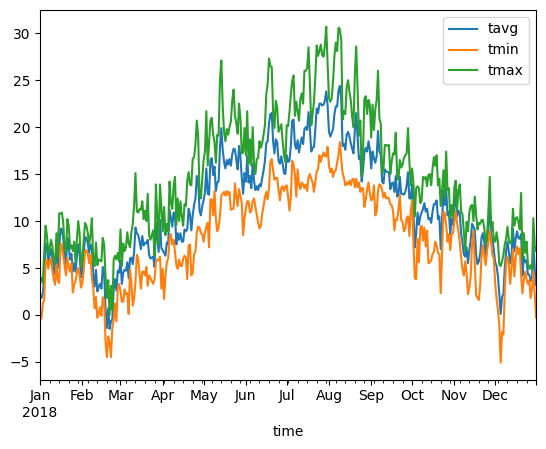

In [1]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(vancouver, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [ ]:
# app.layout = html.Div([
# html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),
# html.Br(),
# html.H1("UK Accidents 2011 dataset", style={'text-align': 'center'}),
# html.Br(),
# html.Div(),
# html.H1("Accidents percentage in Speed Zones", style={'text-align': 'center'}),
# dcc.Graph(figure=  plot_speed_zones(df))])

In [2]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import matplotlib.pyplot as plt
import plotly.express as px 


C:\Users\pc\AppData\Local\Temp\ipykernel_15860\2909385702.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\pc\AppData\Local\Temp\ipykernel_15860\2909385702.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:

def plot_speed_zones(df):
    speed  = df['speed_limit'].value_counts()

    
    
    fig_title="Percentage of accidents vs Speed limit"
    
    fig = px.pie(values = speed.values, names = speed.index)

    fig.update_layout(title=fig_title, title_x=0.5)
    
    
    return fig
    
df = pd.read_csv('2011_Accidents_UK.csv')

plot_speed_zones(df)
app = dash.Dash()
app.layout = html.Div([dcc.Graph(figure=  plot_speed_zones(df))])
app.run_server(host='0.0.0.0') 
print('dashboard is successful and running on port 8000')

    

C:\Users\pc\AppData\Local\Temp\ipykernel_15860\2174742635.py:15: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2011_Accidents_UK.csv')


Dash is running on http://0.0.0.0:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://192.168.1.3:8050
Press CTRL+C to quit
192.168.1.3 - - [27/Dec/2022 20:53:09] "GET / HTTP/1.1" 200 -
192.168.1.3 - - [27/Dec/2022 20:53:09] "GET /_dash-dependencies HTTP/1.1" 200 -
192.168.1.3 - - [27/Dec/2022 20:53:09] "GET /_dash-layout HTTP/1.1" 200 -
192.168.1.3 - - [27/Dec/2022 20:53:09] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
192.168.1.3 - - [27/Dec/2022 20:53:09] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -


In [2]:
!pip3 show dash

Name: dash
Version: 2.7.1
Summary: A Python framework for building reactive web-apps. Developed by Plotly.
Home-page: https://plotly.com/dash
Author: Chris Parmer
Author-email: chris@plotly.com
License: MIT
Location: c:\users\pc\appdata\local\programs\python\python310\lib\site-packages
Requires: dash-core-components, dash-html-components, dash-table, Flask, plotly
Required-by: 


In [ ]:
def scatter(df):
    df_survivedTitanic = (df[(df['Age'].notnull()) & (df['Age']>=1) & (df['Survived']==1) ])
    age_counts = df_survivedTitanic.groupby(['Age'])['Survived'].sum() #returns a series of each age and the corresponding number of individuals who survived
    fig_title="Relationship between age and number of survivors"
    fig = px.scatter(x=age_counts.index, y=age_counts)
    fig.update_layout(
    title=fig_title,
    xaxis_title="Age",
    yaxis_title="survival_count")
    return fig
def histogram(df):
    fig = px.histogram(df,x="Age")
    return fig

In [ ]:
app = Dash()
app.layout = html.Div([
    html.H1("Web Application Dashboards with Dash", style={'text-align': 'center'}),
    html.Br(),
    html.H1("Titanic dataset", style={'text-align': 'center'}),
    html.Br(),
    html.Div(),
    html.H1("Relationship between age and number of survivors", style={'text-align': 'center'}),
    dcc.Graph(figure=scatter(df)),
    html.Br(),
    html.Div(),
    html.H1("Age Histogram", style={'text-align': 'center'}),
    dcc.Graph(figure=histogram(df)),
    html.H1("Gas Prices dataset", style={'text-align': 'center'}),
    dcc.Dropdown(id="select nations",
                 options=[
                     {"label": "Japan", "value": "Japan"},
                     {"label": "Italy", "value": "Italy"},
                     {"label": "UK", "value": "UK"},
                     {"label": "USA", "value": "USA"}],
                 multi=False,
                 value="Japan",
                 style={'width': "40%"}
                 ),
    html.Div(id='output_container', children=[]),
    html.Br(),
    dcc.Graph(id='gas_prices_line_chart', figure={})
])
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='gas_prices_line_chart', component_property='figure')],
    [Input(component_id='select nations', component_property='value')]
)
def update_graph(option_slctd):
    container = "The year chosen by user was: {}".format(option_slctd)

#     dff = df.copy()
#     dff = dff[dff["Year"] == option_slctd]
#     dff = dff[dff["Affected by"] == "Varroa_mites"]
    # Plotly Express
    fig = px.line(df_gas,x=df_gas.Year,y=df_gas[option_slctd])
    fig.update_layout(
    title=f"Gas Prices of {option_slctd}",
    xaxis_title="Year",
    yaxis_title="Gas Price")
    return container, fig